<a href="https://colab.research.google.com/github/asbin77/hotel_booking_ml_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Here among 32 columns in this data frame, columns like children,country,agent
and company have null values.

In [ ]:
df1=df.copy()

In [ ]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

BB = Bed & Breakfast,HB = Half Board,Full Board,SC = Self Catering

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

TA=Travel agency

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

# **Data Cleaning**
Data cleaning is a crucial step before performing Exploratory Data Analysis (EDA), as it removes ambiguous and inconsistent data that could negatively affect the analysis results.
During data cleaning, the following steps are performed:

*   Remove duplicate rows
*   Convert columns to appropriate data types
*   Add important or derived columns













 **Step 1: Removing duplicate rows if any**




In [ ]:
df1[df1.duplicated()].shape

(31994, 32)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(87396, 32)

In [ ]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [ ]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

**Step 2: Converting columns to appropriate datatypes.**

In [ ]:
# changing datatype of column 'reservation_status_date' to date_time.
df1['reservation_status_date'] = pd.to_datetime(
    df1['reservation_status_date'],
    format='mixed',
    errors='coerce'
)


**Step 3: Adding important columns.**

In [ ]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column,
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

# **EDA**




In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

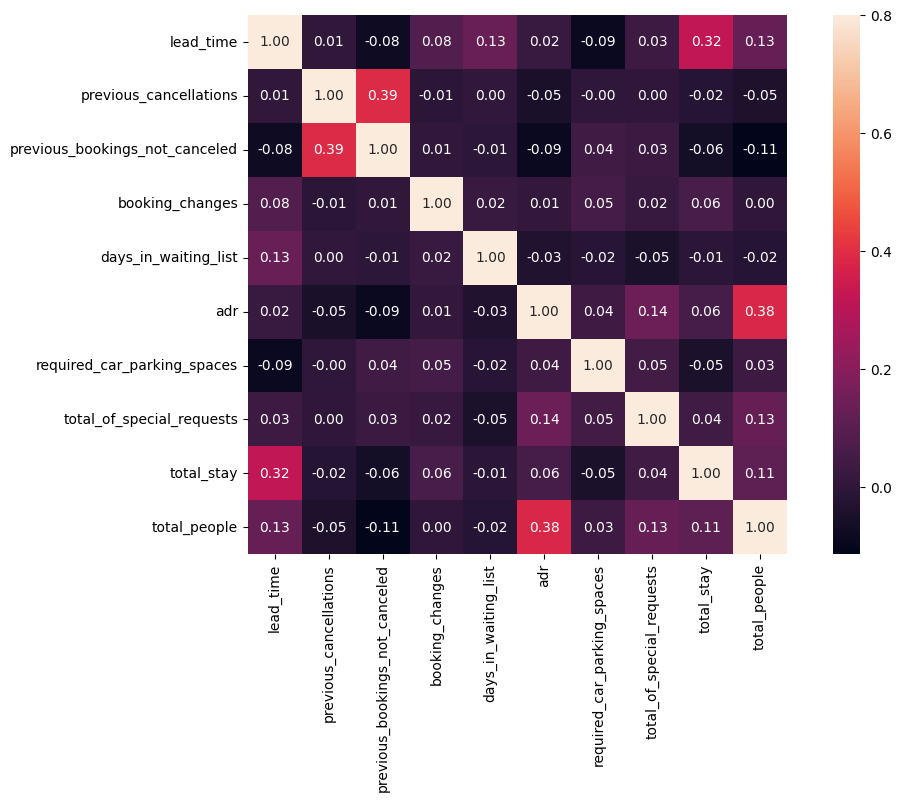

In [ ]:
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

These are the findings:
1. lead time is slightly correlated to total stay that means for longer vacaction people usually book ahead of time.
2. adr and total people are also correlated as more number of people generates more revenue.
3. previous_cancellation has slightly correlation with previous_booking_not_cancellation that mean customer may have higher booking rate also have higher cancellation too.


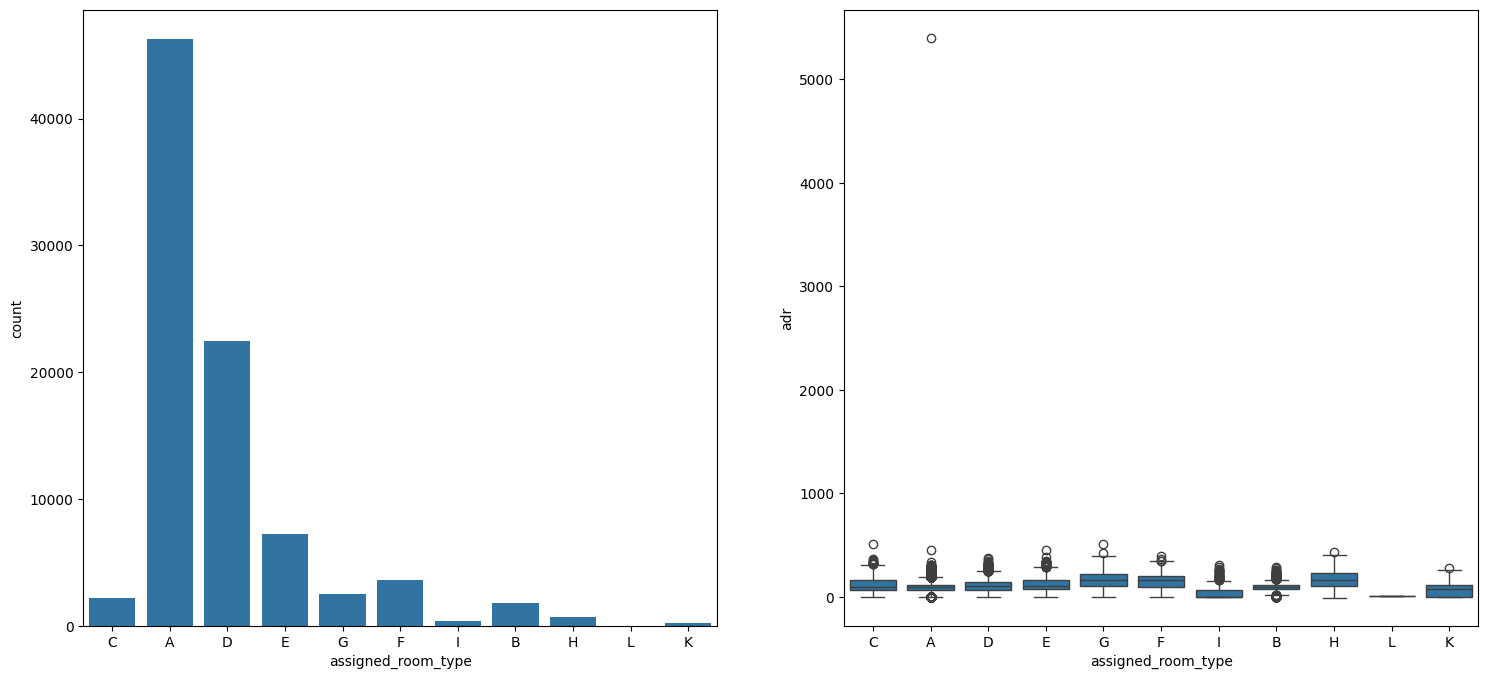

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
df1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

 Room types H and G have the highest median ADR

 Room types A and D are comparatively cheaper

 Some room types show high price variability


# **Univariate Analysis**

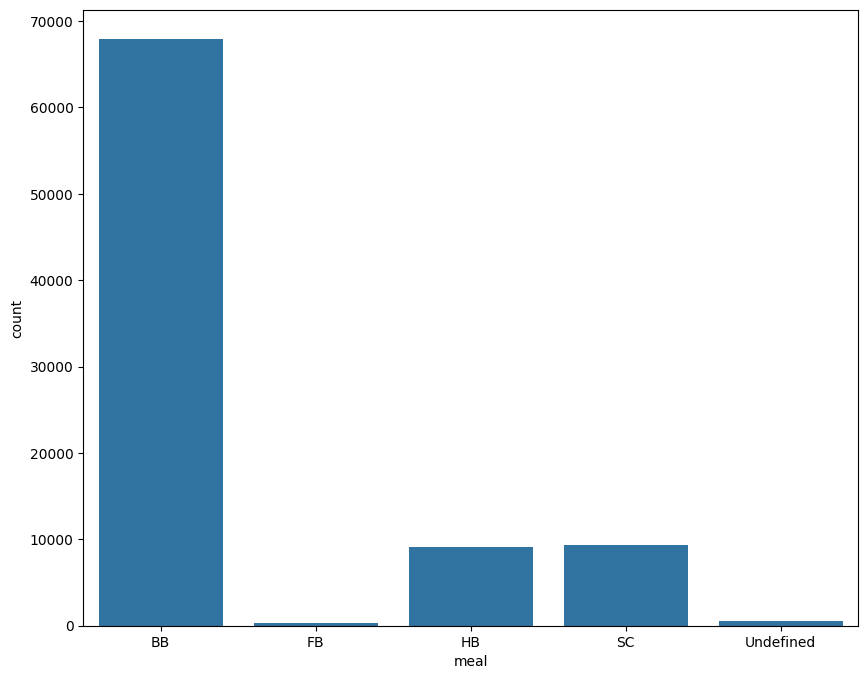

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df1['meal'])
plt.show()

Most preferred meal type is BB(Bead and Breakfast)

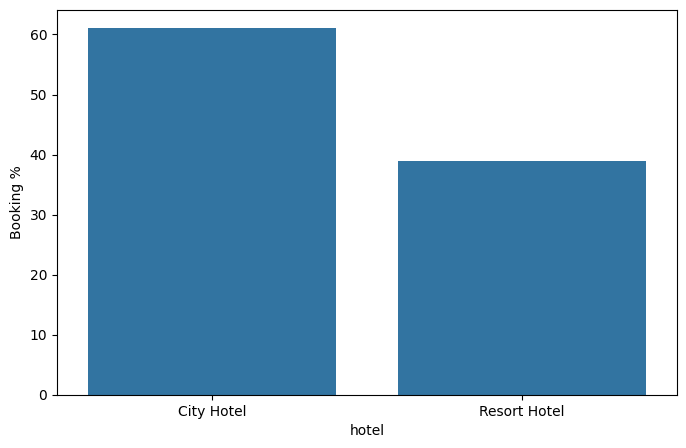

In [ ]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


City hotel gets around 60% and Resort hotel gets around 40% of booking

/tmp/ipython-input-773686721.py:1: FutureWarning: The provided callable <function mean at 0x7cf551c09a80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr


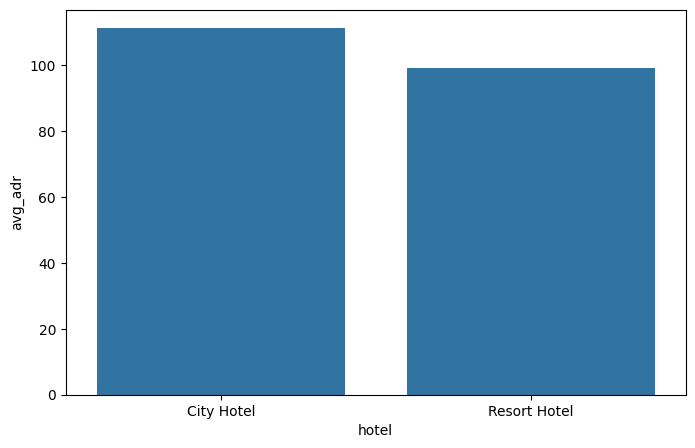

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

This shows City hotel is making more revenue compared to Resort hotel

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


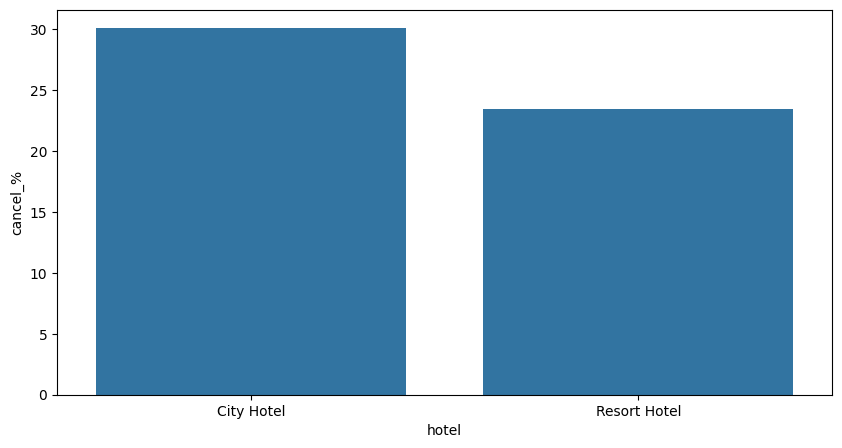

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

Which is the most common channel for booking hotels?



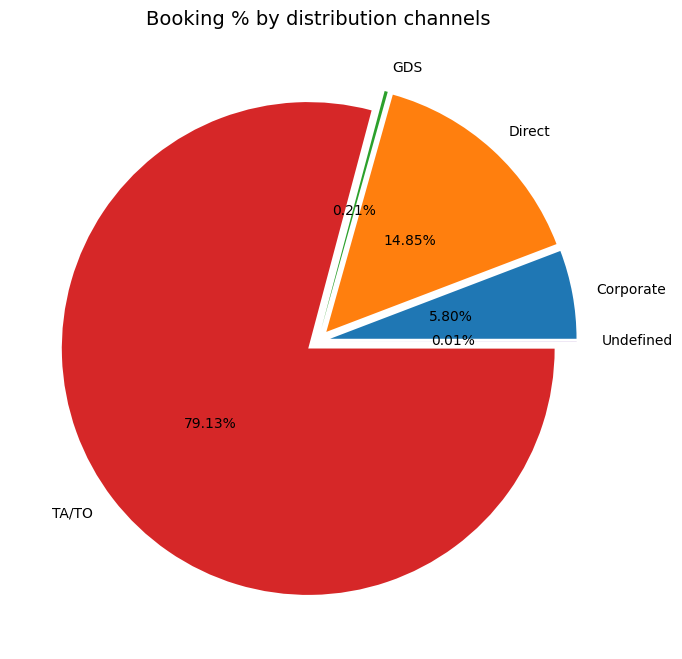

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

/tmp/ipython-input-4241740995.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_people = df1.groupby(['arrival_date_month', 'hotel'])['total_people'].sum().reset_index()


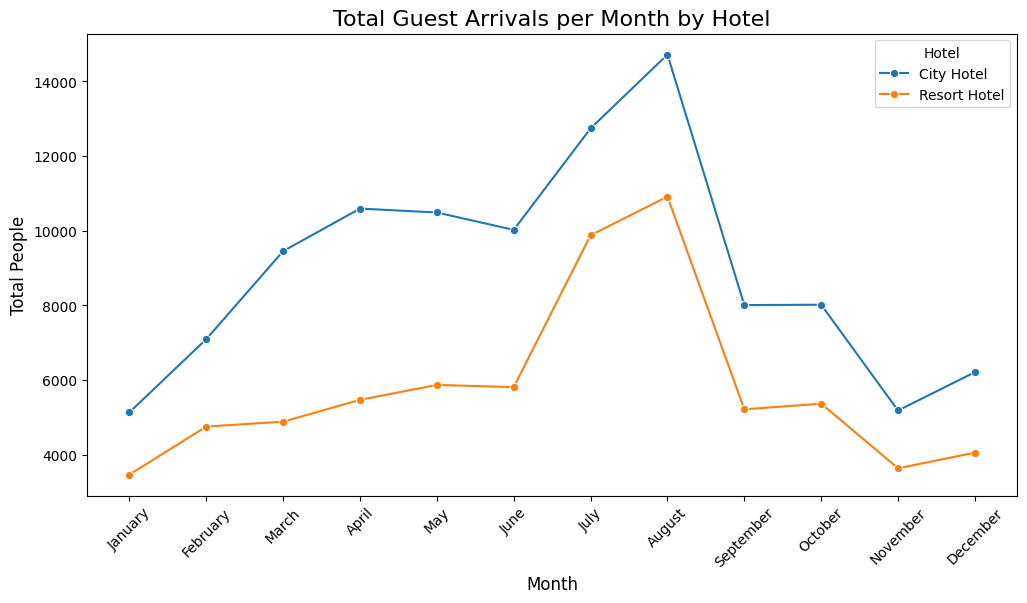

In [ ]:
# Ensure months are in correct order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], categories=months_order, ordered=True)

# Group by month AND hotel, sum total_people
monthly_people = df1.groupby(['arrival_date_month', 'hotel'])['total_people'].sum().reset_index()

# Plot lineplot with hotel as hue
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='total_people', hue='hotel', data=monthly_people, marker='o')
plt.title("Total Guest Arrivals per Month by Hotel", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total People", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.show()

July and August are the peak months.

/tmp/ipython-input-599492847.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()


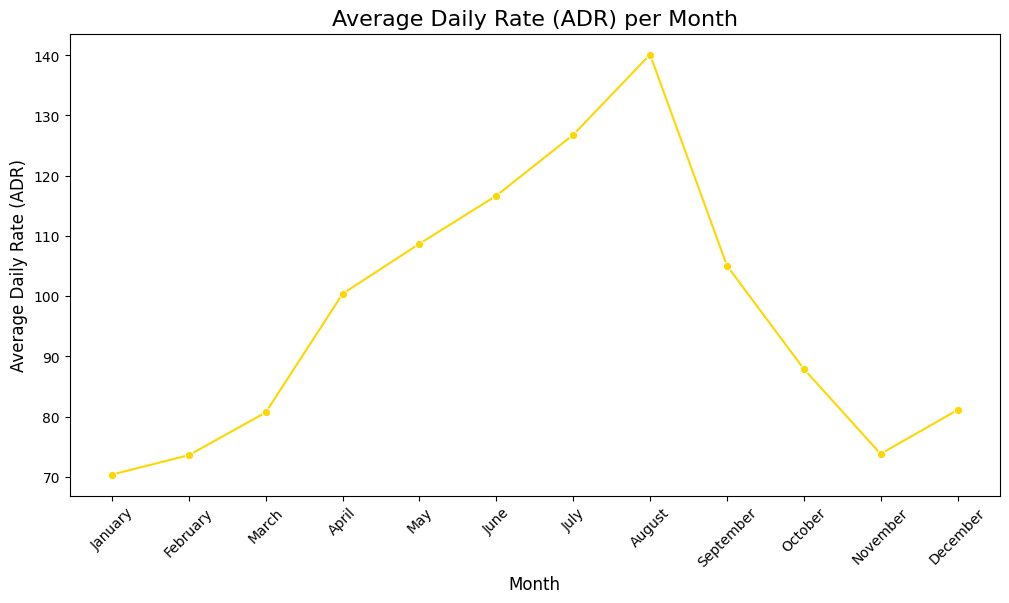

In [ ]:
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', data=monthly_adr, marker='o', color='gold')
plt.title("Average Daily Rate (ADR) per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

It also show during july and August adr is high as visitors are also high.

# **Imputation**

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
X = df1.drop(columns=['is_canceled'], axis=1)
y = df1['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='most_frequent')
imputer3 = SimpleImputer(strategy='constant',fill_value=0)


In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='most_frequent')
imputer3 = SimpleImputer(strategy='constant',fill_value=0)

trf = ColumnTransformer([
    ('imputer1_children', imputer1, ['children']),
    ('imputer1_total_people', imputer1, ['total_people']),
    ('imputer1_num_bookings', imputer1, ['Num_of_bookings']),
    ('imputer2_agent', imputer2, ['agent']),
    ('imputer2_country', imputer2, ['country']),
    ('imputer3_company', imputer3, ['company'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Num_of_bookings']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1_children',
                                 SimpleImputer(strategy='median'),
                                 ['children']),
                                ('imputer1_total_people',
                                 SimpleImputer(strategy='median'),
                                 ['total_people']),
                                ('imputer1_num_bookings',
                                 SimpleImputer(strategy='median'),
                                 ['Num_of_bookings']),
                                ('imputer2_agent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['agent']),
                                ('imputer2_country',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['country']),
                                ('imputer3_company',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['company'])])

In [ ]:
X_train_imputed= trf.transform(X_train)
X_test_imputed = trf.transform(X_test)



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Num_of_bookings']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Num_of_bookings']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
all_imputed_cols = trf.get_feature_names_out(X_train.columns)

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=all_imputed_cols)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=all_imputed_cols)

In [ ]:
X_train_imputed


array([[0.0, 3.0, 9.0, ..., 'Canceled', Timestamp('2017-02-16 00:00:00'),
        2],
       [0.0, 2.0, 138.0, ..., 'Check-Out',
        Timestamp('2016-08-15 00:00:00'), 3],
       [0.0, 3.0, 2.0, ..., 'Canceled', Timestamp('2016-05-19 00:00:00'),
        11],
       ...,
       [0.0, 1.0, 52.0, ..., 'Check-Out',
        Timestamp('2017-03-07 00:00:00'), 3],
       [0.0, 2.0, 9.0, ..., 'Check-Out',
        Timestamp('2015-08-06 00:00:00'), 1],
       [0.0, 1.0, 241.0, ..., 'Check-Out',
        Timestamp('2016-04-01 00:00:00'), 1]], dtype=object)

In [ ]:
print('Original child variable variance: ', X_train['children'].var())
print('child Variance after median imputation: ', X_train_imputed_df['imputer1_children__children'].var())

print('Original agent variable variance: ', X_train['agent'].var())
print('agent Variance after mode imputation: ', X_train_imputed_df['imputer2_agent__agent'].var())

print('Original company variable variance: ', X_train['company'].var())
print('company Variance after constant imputation: ', X_train_imputed_df['imputer3_company__company'].var())

Original child variable variance:  0.2099871608716382
child Variance after median imputation:  0.20997897871636784
Original agent variable variance:  12828.76542447072
agent Variance after mode imputation:  11917.973303782852
Original company variable variance:  17009.967870269567
company Variance after constant imputation:  2919.7044983986148


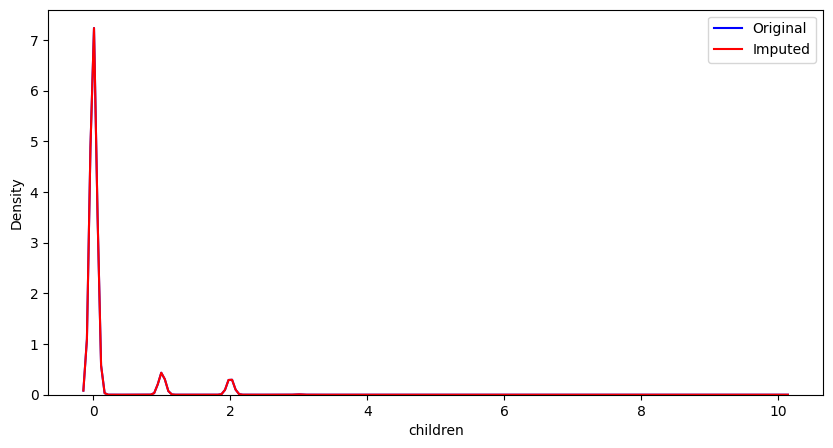

In [ ]:
plt.figure(figsize=(10,5))
# Plot original
sns.kdeplot(X_train['children'], label='Original', color='blue')
# Plot imputed
sns.kdeplot(X_train_imputed_df['imputer1_children__children'], label='Imputed', color='red')
plt.legend()
plt.show()

In [ ]:
# Checking if there are any NULL values
print(X_train_imputed_df.isnull().sum())

imputer1_children__children                  0
imputer1_total_people__total_people          0
imputer2_agent__agent                        0
imputer2_country__country                    0
imputer3_company__company                    0
remainder__hotel                             0
remainder__lead_time                         0
remainder__arrival_date_year                 0
remainder__arrival_date_month                0
remainder__arrival_date_week_number          0
remainder__arrival_date_day_of_month         0
remainder__stays_in_weekend_nights           0
remainder__stays_in_week_nights              0
remainder__adults                            0
remainder__babies                            0
remainder__meal                              0
remainder__market_segment                    0
remainder__distribution_channel              0
remainder__is_repeated_guest                 0
remainder__previous_cancellations            0
remainder__previous_bookings_not_canceled    0
remainder__re

Therefore all missing values are imputed.

# **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oe = OrdinalEncoder(categories=[['No Deposit', 'Refundable', 'Non Refund']])

text_cols = ['remainder__hotel', 'remainder__meal', 'remainder__market_segment', 'remainder__distribution_channel',
             'remainder__arrival_date_month', 'imputer2_country__country', 'remainder__reserved_room_type',
             'remainder__assigned_room_type', 'remainder__customer_type']


In [ ]:

# A. Transform the text columns
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_imputed_df[text_cols]),
                           columns=ohe.get_feature_names_out(text_cols))
X_test_ohe = pd.DataFrame(ohe.transform(X_test_imputed_df[text_cols]),
                          columns=ohe.get_feature_names_out(text_cols))

# B. Transform the ranked column (Deposit)
X_train_oe = pd.DataFrame(oe.fit_transform(X_train_imputed_df[['remainder__deposit_type']]),
                          columns=['remainder__deposit_type_encoded'])
X_test_oe = pd.DataFrame(oe.transform(X_test_imputed_df[['remainder__deposit_type']]),
                         columns=['remainder__deposit_type_encoded'])


In [ ]:

# We drop text_cols, deposit_type, AND the leaky columns
leaky_cols = ['remainder__reservation_status', 'remainder__reservation_status_date']

columns_to_drop = text_cols + ['remainder__deposit_type'] + leaky_cols

reservation status is leaky as they contain info about cancellation

In [ ]:


# Filter out columns that don't exist in X_train_imputed_df before dropping
# This handles cases where some columns might have been dropped earlier or are not present due to other processing steps
actual_cols_to_drop_train = [col for col in columns_to_drop if col in X_train_imputed_df.columns]
actual_cols_to_drop_test = [col for col in columns_to_drop if col in X_test_imputed_df.columns]

X_train_num = X_train_imputed_df.drop(columns=actual_cols_to_drop_train).reset_index(drop=True)
X_test_num = X_test_imputed_df.drop(columns=actual_cols_to_drop_test).reset_index(drop=True)

X_train_final = pd.concat([X_train_num, X_train_ohe, X_train_oe], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ohe, X_test_oe], axis=1)

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# **Model Training & Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train it
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred = model.predict(X_test_scaled)

# Check Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8523443769345409
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12728
           1       0.78      0.63      0.70      4718

    accuracy                           0.85     17446
   macro avg       0.83      0.78      0.80     17446
weighted avg       0.85      0.85      0.85     17446



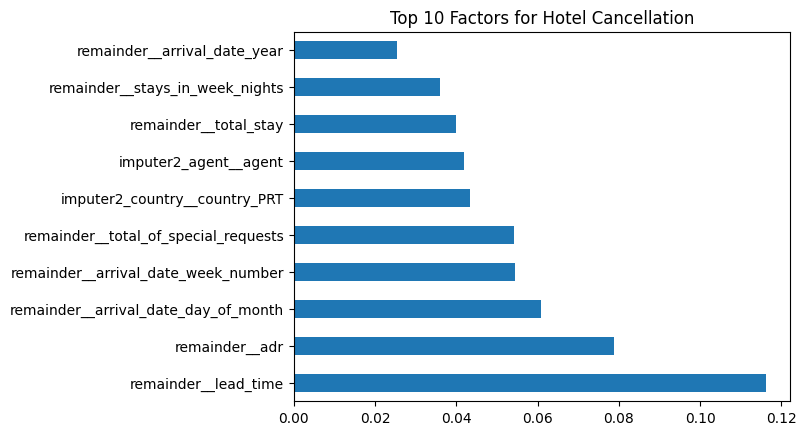

In [ ]:
# Get importance from the model
importances = model.feature_importances_
feature_names = X_train_final.columns

# Plot the top 10
pd.Series(importances, index=feature_names).nlargest(10).plot(kind='barh')
plt.title("Top 10 Factors for Hotel Cancellation")
plt.show()

**Factors affecting Cancellation of Hotel Booking:**







1.   Lead Time: Guests who book a long time in advance are much more likely to cancel or have their plans change compared to last-minute bookers.

2.  ADR (Average Daily Rate):Higher-priced rooms often see different cancellation patterns.
3.  Total Special Requests: Interestingly, guests who ask for specific things (high floor, extra pillows) are usually more "invested" in their stay and less likely to cancel.
4. Country_PRT: Local vs. International travel patterns are showing up as a significant indicator as this hotel lies on portugal.

